In [2]:
from psycopg2 import connect
from modules.Velocidade_contratada import Velocidade_contratada
from modules.conector_postgree import Interface_db_postgree
from modules.conector_cassandra import Interface_db_cassandra
import pandas as pd
import numpy as np
from pyspark.sql import SparkSession
import psycopg2
from psycopg2.extras import execute_values
from cassandra.query import BatchStatement
from cassandra.cluster import Cluster, ProfileManager
import matplotlib.pyplot as plt

In [16]:
def chunk(dataframe, size):
    
    for i in range(0, len(dataframe), size): 
        yield dataframe[i:i + size]

In [17]:
lendo = Velocidade_contratada(r"C:\Users\isa66\Desktop\Visualcode\.vscode\Telecomunicações\arquivos\velocidade_contratada\Velocidade_Contratada_SCM.csv")
lendo.tratamento_geral()
df_velocidade_contratada = lendo.get_resultado()
print('tratado')
print(df_velocidade_contratada.info())

tratado
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5789372 entries, 0 to 5789371
Data columns (total 11 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Ano                         float64
 1   Mês                         float64
 2   razao_social                object 
 3   cnpj                        object 
 4   velocidade_contratada_mbps  object 
 5   uf                          object 
 6   municipio                   object 
 7   codigo_ibge                 float64
 8   acessos                     float64
 9   tipo                        object 
 10  municipio_uf                object 
dtypes: float64(4), object(7)
memory usage: 485.9+ MB
None


In [20]:
# df_velocidade_contratada['velocidade_contratada_mbps'] = df_velocidade_contratada['velocidade_contratada_mbps'].str.replace(",", ".")
df_velocidade_contratada['velocidade_contratada_mbps'] = df_velocidade_contratada['velocidade_contratada_mbps'].astype(float, errors = 'raise')
chunked_velocidade_contratada = chunk(df_velocidade_contratada, 50000)

In [22]:
print(df_velocidade_contratada.info())
con = psycopg2.connect(user='postgres', password='Eugostode@55', host='localhost', database='telecomunicacao')
cursor = con.cursor()
print('conexao')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5789372 entries, 0 to 5789371
Data columns (total 11 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Ano                         float64
 1   Mês                         float64
 2   razao_social                object 
 3   cnpj                        object 
 4   velocidade_contratada_mbps  float64
 5   uf                          object 
 6   municipio                   object 
 7   codigo_ibge                 float64
 8   acessos                     float64
 9   tipo                        object 
 10  municipio_uf                object 
dtypes: float64(5), object(6)
memory usage: 485.9+ MB
None
conexao


In [23]:
for df in chunked_velocidade_contratada:
    try:
        data = np.array(df)
        list_postgre = []
        for item in data:
            value = tuple(item)
            list_postgre.append(value)  
        sql = f"INSERT INTO velocidade_contratada (ano,mes,razao_social ,cnpj ,velocidade_contratada_mbps,uf ,municipio ,codigo_ibge,acessos,tipo ,municipio_uf) values  %s;"
        execute_values(cursor, sql, list_postgre)
        con.commit()
        print('inerindo')
    except Exception as e:
        print("Erro ao inserir dados ", str(e))

inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
i

In [24]:
conect_post = Interface_db_postgree('postgres','Eugostode@55', 'localhost', 'telecomunicacao')

In [26]:
dados_velocidade_contratada = conect_post.select(query=" select t1.*,  t2.uf, t2.municipio, t2.codigo_ibge, t2.acessos, t2.tipo, t2.municipio_uf  from EmpresaVelocidade t1 inner join LocalidadeVelocidade t2  on t1.id_Velocidade_contratada = t2.id_Velocidade_contratada order by t1.id_Velocidade_contratada;") 
df_velocidade_contratada = pd.DataFrame(dados_velocidade_contratada)
a = df_velocidade_contratada.info()
print(a)
print(df_velocidade_contratada)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5789372 entries, 0 to 5789371
Data columns (total 12 columns):
 #   Column  Dtype  
---  ------  -----  
 0   0       int64  
 1   1       float64
 2   2       float64
 3   3       object 
 4   4       object 
 5   5       float64
 6   6       object 
 7   7       object 
 8   8       float64
 9   9       float64
 10  10      object 
 11  11      object 
dtypes: float64(5), int64(1), object(6)
memory usage: 530.0+ MB
None
              0       1     2                  3                   4   \
0              1  2020.0  12.0  algar telecom s/a  71.208.516/0001-74   
1              2  2020.0  12.0  algar telecom s/a  71.208.516/0001-74   
2              3  2020.0  12.0  algar telecom s/a  71.208.516/0001-74   
3              4  2020.0  12.0  algar telecom s/a  71.208.516/0001-74   
4              5  2020.0  12.0  algar telecom s/a  71.208.516/0001-74   
...          ...     ...   ...                ...                 ...   
5789367  5789

In [27]:
query = """
    INSERT INTO velocidade_contratada (
        id_Velocidade_contratada,
        ano,
        mes,
        razao_social,	
        cnpj,	
        velocidade_contratada_mbps,
        uf,
        municipio,	
        codigo_ibge,
        acessos,
        tipo,	
        municipio_uf
    ) values (
        ?,?,?,?,?,?,?,?,?,?,?,?
    )
"""

In [29]:
conect_cassa = Interface_db_cassandra('telecomunicacoes') 

In [30]:
insert = conect_cassa.connector().prepare(query)
chunked_df = chunk(df_velocidade_contratada, 100)
for df in chunked_df:
    batch = BatchStatement()
    for _, row in df.iterrows():
        batch.add(insert, tuple(row))
    print(">> executando batch")
    conect_cassa.inserir(batch)
print(">> dados inseridos")
    
print("inseriu tudo")

>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch


In [31]:
conect_cassa = Cluster()
session = conect_cassa.connect("telecomunicacoes")
# dados_parquet = pd.read_parquet(r"C:\Users\isa66\Desktop\Visualcode\.vscode\Telecomunicações\arquivos\velocidade_contratada\velocidade_contratada")
# print(dados_parquet)

In [32]:
query = "SELECT * FROM velocidade_contratada;"
a = session.execute(query) 

In [33]:
lista = []
for i in a:
    lista.append(i)
b = pd.DataFrame(lista)   
print(b)

         id_velocidade_contratada  acessos     ano                cnpj  \
0                         4494115     79.0  2017.0  76.535.764/0001-43   
1                         1792034      1.0  2019.0  76.535.764/0001-43   
2                         3607449     15.0  2018.0  02.558.157/0001-62   
3                          302602      1.0  2020.0  33.000.118/0001-79   
4                         3819940      5.0  2018.0  33.000.118/0001-79   
...                           ...      ...     ...                 ...   
5789367                   1220022      9.0  2020.0  76.535.764/0001-43   
5789368                   2403942      1.0  2019.0  05.423.963/0001-11   
5789369                   2860684      1.0  2019.0  40.432.544/0001-47   
5789370                   5400153    254.0  2017.0  76.535.764/0001-43   
5789371                   1376241      2.0  2020.0  40.432.544/0001-47   

         codigo_ibge   mes             municipio               municipio_uf  \
0          4209508.0  12.0      

In [34]:
b.sort_values(by=['id_velocidade_contratada'], ascending=False, inplace=True)
#b['velocidade_contratada_mbps'] = b['velocidade_contratada_mbps'].str.replace(",", ".")
# b['velocidade_contratada_mbps'] = b['velocidade_contratada_mbps'].astype(float, errors = 'raise')

internet = b.loc[b["tipo"] == 'INTERNET']
nao_internet = b.loc[b["tipo"] == 'NÃO INTERNET']



dataframe_internet = internet.groupby("ano").mean()
dataframe_internet.reset_index(inplace = True)
dataframe_nao_internet = nao_internet.groupby("ano").mean()
dataframe_nao_internet.reset_index(inplace = True)


In [35]:
dataframe_internet.head()

,ano,id_velocidade_contratada,acessos,codigo_ibge,mes,velocidade_contratada_mbps
0,2017.0,5.092524e+06,433.492404,3.530844e+06,6.507240,13.314384
1,2018.0,3.676768e+06,423.410487,3.518670e+06,6.556440,21.917762
2,2019.0,2.236216e+06,422.373391,3.501858e+06,6.528921,23.370980
3,2020.0,7.591738e+05,400.197314,3.500231e+06,6.492272,30.828482


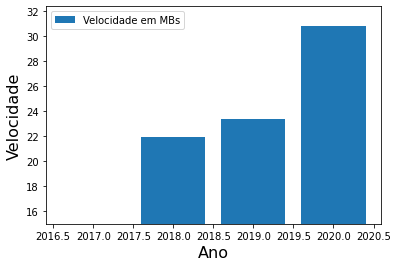

In [36]:
plt.bar(dataframe_internet['ano'], dataframe_internet['velocidade_contratada_mbps'])
plt.ylim(15)
plt.xlabel("Ano", fontsize=16)
plt.ylabel("Velocidade", fontsize=16)
plt.legend(['Velocidade em MBs'])

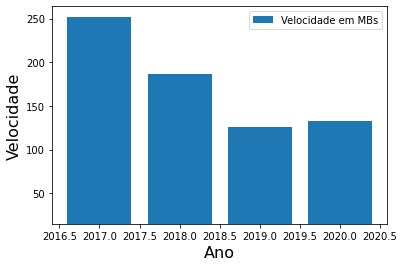

In [37]:
plt.bar(dataframe_nao_internet['ano'], dataframe_nao_internet['velocidade_contratada_mbps'])
plt.ylim(15)
plt.xlabel("Ano", fontsize=16)
plt.ylabel("Velocidade", fontsize=16)
plt.legend(['Velocidade em MBs'])